Using Sklearn Library's Decision Tree Model on Raw Accelerometer Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
activity_dirs = {
    'LAYING': "/content/drive/MyDrive/combined1/Combined/Train/LAYING",
    'SITTING': "/content/drive/MyDrive/combined1/Combined/Train/SITTING",
    'STANDING': "/content/drive/MyDrive/combined1/Combined/Train/STANDING",
    'WALKING': "/content/drive/MyDrive/combined1/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/drive/MyDrive/combined1/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/drive/MyDrive/combined1/Combined/Train/WALKING_UPSTAIRS"
}
X = []
y = []


for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        total_acceleration = np.concatenate((acc_x, acc_y, acc_z))
        X.append(total_acceleration)
        y.append(activity)

X = np.array(X)
y = np.array(y)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=38)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
precision1, recall1, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
conf_matrix1 = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print("Confusion Matrix:")
print(conf_matrix1)

Accuracy: 0.6579
Precision: 0.7027
Recall: 0.6579
Confusion Matrix:
[[7 0 0 0 0 1]
 [0 4 3 0 0 0]
 [0 0 6 0 0 0]
 [0 1 3 2 0 0]
 [0 0 0 0 4 1]
 [0 0 1 1 2 2]]


Using Sklearn Library's Decision Tree Model using TSFEL Features



In [ ]:
import pandas as pd
import numpy as np
import tsfel
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

activity_dirs = {
    'LAYING': "/content/drive/MyDrive/combined1/Combined/Train/LAYING",
    'SITTING': "/content/drive/MyDrive/combined1/Combined/Train/SITTING",
    'STANDING': "/content/drive/MyDrive/combined1/Combined/Train/STANDING",
    'WALKING': "/content/drive/MyDrive/combined1/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/drive/MyDrive/combined1/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/drive/MyDrive/combined1/Combined/Train/WALKING_UPSTAIRS"
}

X_features = []
y = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0)

        X_features.append(features.values.flatten())
        y.append(activity)

X = np.array(X_features)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=30)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
conf_matrix2 = confusion_matrix(y_test, y_pred)

print("accuracy=",accuracy2)
print("precision=",precision2)
print("recall=",recall2)
print("Confusion Matrix:")
print(conf_matrix2)

/tmp/ipython-input-2775456924.py:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-2775456924.py:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-2775456924.py:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-2775456924.py:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-2775456924.py:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-2775456924.py:28: UserWarning: Using default sampling frequency set in 

accuracy= 0.8461538461538461
precision= 0.8743589743589743
recall= 0.8461538461538461
Confusion Matrix:
[[5 1 0 0 0 0]
 [0 3 1 0 0 0]
 [0 1 4 0 0 0]
 [0 0 0 4 0 1]
 [0 0 0 0 4 0]
 [0 0 0 0 0 2]]


Using Sklearn Library's Decision Tree Model on features of the Dataset


In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


features_path = "/content/drive/MyDrive/combined1/UCI HAR Dataset/train/X_train.txt"
labels_path = "/content/drive/MyDrive/combined1/UCI HAR Dataset/train/y_train.txt"
features_names_path = "/content/drive/MyDrive/combined1/UCI HAR Dataset/UCI HAR Dataset/features.txt"

feature_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()

def unify(names):
    counts = defaultdict(int)
    unique_names = []
    for name in names:
        if counts[name] > 0:
            new_name = f"{name}_{counts[name]}"
            unique_names.append(new_name)
        else:
            unique_names.append(name)
        counts[name] += 1
    return unique_names

feature_names = unify(feature_names)

X = pd.read_csv(features_path, delim_whitespace=True, header=None, names=feature_names)
y = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=30)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred, average='weighted')
recall3 = recall_score(y_test, y_pred, average='weighted')
conf_matrix3 = confusion_matrix(y_test, y_pred)

print("accuracy=",accuracy3)
print("precision=",precision3)
print("recall=",recall3)
print("Confusion Matrix:")
print(conf_matrix3)

/tmp/ipython-input-1044110935.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  feature_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()
/tmp/ipython-input-1044110935.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(features_path, delim_whitespace=True, header=None, names=feature_names)
/tmp/ipython-input-1044110935.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])


Features shape: (7352, 561)
Labels shape: (7352, 1)
accuracy= 0.947654656696125
precision= 0.947980513959129
recall= 0.947654656696125
Confusion Matrix:
[[235   9   2   0   1   0]
 [  9 188   3   0   0   0]
 [ 10   5 191   0   0   0]
 [  0   0   0 243  19   0]
 [  0   0   0  19 257   0]
 [  0   0   0   0   0 280]]


Comparing the Results of the Three Models

[0.6578947368421053, 0.8461538461538461, 0.947654656696125]
[0.7026990553306343, 0.8743589743589743, 0.947980513959129]
[0.6578947368421053, 0.8461538461538461, 0.947654656696125]


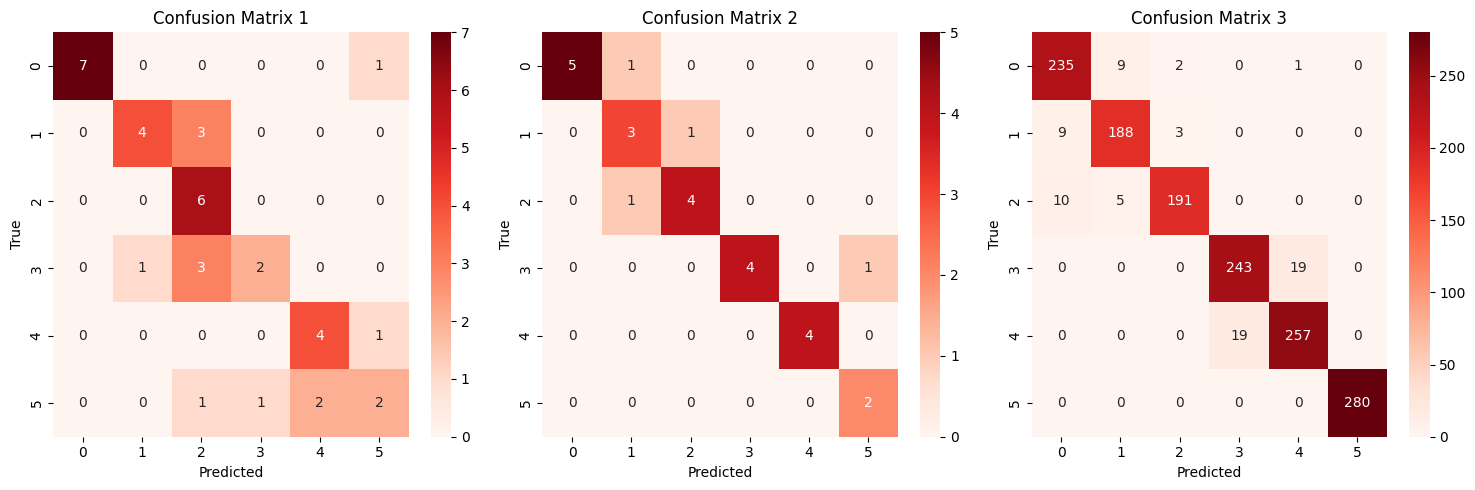

In [ ]:
accuracy=[accuracy1,accuracy2,accuracy3]
precision=[precision1,precision2,precision3]
recall=[recall1,recall2,recall3]
print(accuracy)
print(precision)
print(recall)
conf_matrices = [conf_matrix1, conf_matrix2, conf_matrix3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (cm, ax) in enumerate(zip(conf_matrices, axes)):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Reds')
    ax.set_title(f'Confusion Matrix {i+1}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

We find that the model where we use the features given by the author works the best as the features are modeled in a way to get meaningful information from the data they collected. The model that performs the second best is using TSFEL features as it still gives us more information in comparision to just raw data.

Training Decision Tree Models on varying depth (2-8) while ploting Accuracy relation with depth.

Depth: 2, Accuracy: 0.5263
Depth: 3, Accuracy: 0.6316
Depth: 4, Accuracy: 0.5526
Depth: 5, Accuracy: 0.6053
Depth: 6, Accuracy: 0.6053
Depth: 7, Accuracy: 0.6053
Depth: 8, Accuracy: 0.6053


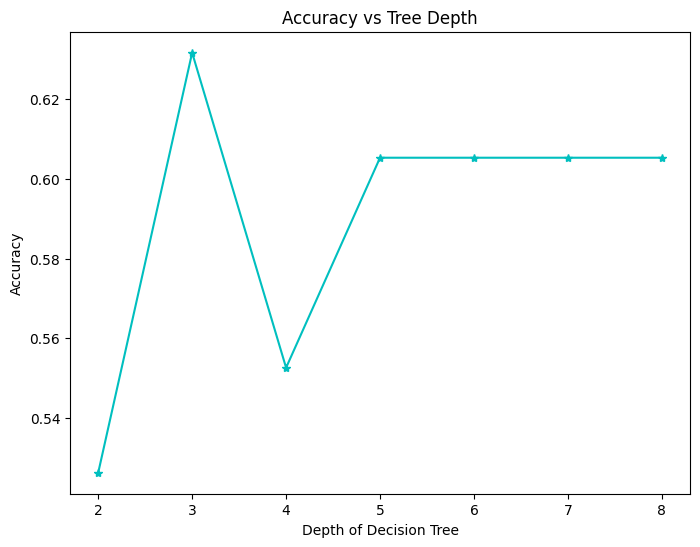

In [ ]:
# RAW Data
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
activity_dirs = {
    'LAYING': "/content/drive/MyDrive/combined1/Combined/Train/LAYING",
    'SITTING': "/content/drive/MyDrive/combined1/Combined/Train/SITTING",
    'STANDING': "/content/drive/MyDrive/combined1/Combined/Train/STANDING",
    'WALKING': "/content/drive/MyDrive/combined1/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/drive/MyDrive/combined1/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/drive/MyDrive/combined1/Combined/Train/WALKING_UPSTAIRS"
}

X = []
y = []


for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        total_acceleration = np.concatenate((acc_x, acc_y, acc_z))
        X.append(total_acceleration)
        y.append(activity)

X = np.array(X)
y = np.array(y)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.3, random_state=42)

depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=30)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy1 = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy1)
    print(f"Depth: {depth}, Accuracy: {accuracy1:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker='*', linestyle='-', color='c')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth')
plt.xticks(depths)
plt.grid(False)
plt.show()

/tmp/ipython-input-1612177305.py:12: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-1612177305.py:12: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-1612177305.py:12: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-1612177305.py:12: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-1612177305.py:12: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
/tmp/ipython-input-1612177305.py:12: UserWarning: Using default sampling frequency set in 

Depth: 2
Accuracy: 0.58
Depth: 3
Accuracy: 0.81
Depth: 4
Accuracy: 0.85
Depth: 5
Accuracy: 0.85
Depth: 6
Accuracy: 0.85
Depth: 7
Accuracy: 0.85
Depth: 8
Accuracy: 0.85


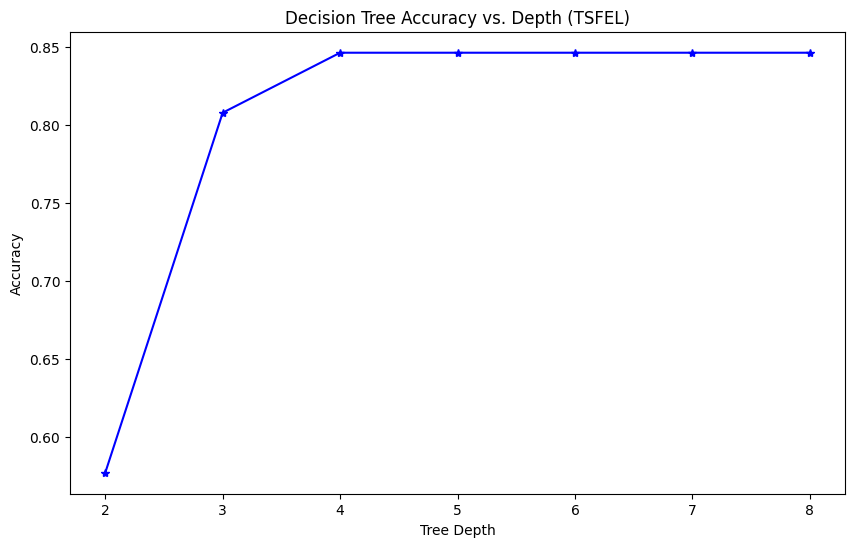

In [ ]:
#TSFEL
X_features = []
y = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0)

        X_features.append(features.values.flatten())
        y.append(activity)

X = np.array(X_features)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=30)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy2 = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy2)

    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='*', linestyle='-', color='b')
plt.title('Decision Tree Accuracy vs. Depth (TSFEL)')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(False)
plt.show()


/tmp/ipython-input-3041998416.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  feature_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()
/tmp/ipython-input-3041998416.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(features_path, delim_whitespace=True, header=None, names=feature_names)
/tmp/ipython-input-3041998416.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])


Features shape: (7352, 561)
Labels shape: (7352, 1)
Depth: 2, Accuracy: 0.55
Depth: 3, Accuracy: 0.79
Depth: 4, Accuracy: 0.89
Depth: 5, Accuracy: 0.89
Depth: 6, Accuracy: 0.92
Depth: 7, Accuracy: 0.93
Depth: 8, Accuracy: 0.94


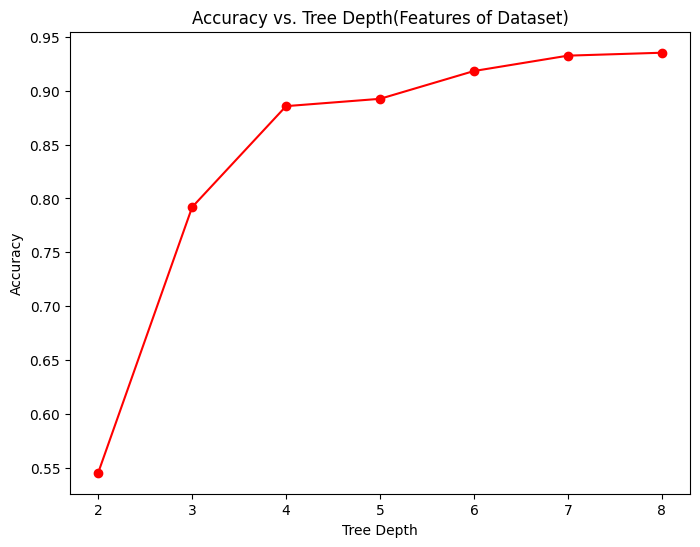

In [ ]:
#Dataset Features
features_path = "/content/drive/MyDrive/combined1/UCI HAR Dataset/train/X_train.txt"
labels_path = "/content/drive/MyDrive/combined1/UCI HAR Dataset/train/y_train.txt"
features_names_path = "/content/drive/MyDrive/combined1/UCI HAR Dataset/UCI HAR Dataset/features.txt"
feature_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()

def unify(names):
    counts = defaultdict(int)
    unique_names = []
    for name in names:
        if counts[name] > 0:
            new_name = f"{name}_{counts[name]}"
            unique_names.append(new_name)
        else:
            unique_names.append(name)
        counts[name] += 1
    return unique_names

feature_names = unify(feature_names)

X = pd.read_csv(features_path, delim_whitespace=True, header=None, names=feature_names)
y = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracies = []


for depth in range(2, 9):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=30)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy3 = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy3)
    print(f"Depth: {depth}, Accuracy: {accuracy3:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), accuracies, marker='o', linestyle='-', color='r')
plt.title('Accuracy vs. Tree Depth(Features of Dataset)')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.grid(False)
plt.xticks(range(2, 9))
plt.show()


**Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?**


*	**Raw Accelerometer Data**:
The model might confuse activities such as sitting and standing, since their acceleration patterns are very similar and the raw signals are noisy. This makes it difficult for the decision tree to find clear boundaries.

* **TSFEL Features**:
The model performs better here but there still might be discripencies in activities like standing and walking because the extracted features may not fully capture subtle directional changes.
* **Provided Features:**
The performance is the best among all three cases, with only minor errors. Occasionally, walking_upstairs and walking_downstairs are confused with each other due to their closely related motion dynamics.

Reason: These misclassifications happen because some activities naturally produce very similar acceleration profiles, and even well-engineered features cannot always separate them perfectly.